In [1]:
import matplotlib.pyplot as plt
from utils.graph import Graph
from utils.pareto_set import ParetoSet
from utils.pareto_set import BiObjSolution as sol
from ipywidgets import interact, widgets
from utils.search_tree_pqd import SearchTreePQD, Node
from collections import defaultdict
from heapq import heapify, heappop, heappush
from typing import Optional
from graph_visualization import visualize_graph
from biobjDijkstra import BDijkstra
import os

In [2]:
# Путь к папке с тестовыми данными
testdata_folder = '../testdata'

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import os
import ipywidgets as widgets
from IPython.display import display, clear_output

# Путь к папке с тестовыми данными
testdata_folder = '../testdata'

# Получаем список файлов в папке
file_list = [f for f in os.listdir(testdata_folder) if os.path.isfile(os.path.join(testdata_folder, f))]

selected_testfile = None
task = Graph()

# Создаем виджет Dropdown с файлами
file_dropdown = widgets.Dropdown(
    options=sorted(file_list),
    value=sorted(file_list)[0],
    description='Select File:'
)

output = widgets.Output()  # Создаем виджет Output для вывода результата
file_path = None


# Функция для обработки события изменения выбранного файла
def handle_file_selection(change):
    global selected_file
    global task
    global file_path
    selected_file = file_dropdown.value
    file_path = os.path.join(testdata_folder, selected_file)
    with output:
        output.clear_output(wait=True)  # Очищаем предыдущий вывод
        try:

            task.read_from_file(file_path)

        except:
            print("ERROR GRAPH READING!!!")

# Назначаем обработчик события изменения для виджета Dropdown
file_dropdown.observe(handle_file_selection, names='value')
handle_file_selection(None)
# Выводим виджеты
display(file_dropdown)



Dropdown(description='Select File:', options=('test_easy_1.txt', 'test_easy_2.txt', 'test_easy_3.txt', 'test_e…

In [4]:
import matplotlib.pyplot as plt
import networkx as nx


def visualize_path(graph, start, stop, good_paths=[], bad_paths=[]):
    edge_list = []
    for node1 in graph:
        for node2 in graph[node1]:
            edge_list.append((node1, node2, {"w": f"{graph[node1][node2][0], graph[node1][node2][1]}"}))

    G = nx.DiGraph()

    G.add_edges_from(edge_list)
    pos=nx.spring_layout(G,seed=1)
    pos=nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw_networkx_nodes(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)

    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
    arc_rad = 0.25
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')

    for path in good_paths:
        edge_list = []
        path_nodes = path[1][::-1]
        for i in range(len(path_nodes)-1):
            edge_list.append((path_nodes[i], path_nodes[i+1]))
        nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edge_list,  edge_color='green')

    edge_weights = nx.get_edge_attributes(G,'w')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)

    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='green', nodelist=[start, stop])
    nx.draw_networkx_labels(G, pos, ax=ax)
    plt.show()

In [5]:
# Путь к папке с тестовыми данными
testdata_folder = '../testdata'

# Получаем список файлов в папке
file_list = [f for f in os.listdir(testdata_folder) if os.path.isfile(os.path.join(testdata_folder, f))]

selected_testfile = None
task = Graph()

# Создаем виджет Dropdown с файлами
file_dropdown = widgets.Dropdown(
    options=sorted(file_list),
    value=sorted(file_list)[0],
    description='Select File:'
)

output = widgets.Output()  # Создаем виджет Output для вывода результата
file_path = None


# Функция для обработки события изменения выбранного файла
def handle_file_selection(change):
    global selected_file
    global task
    global file_path
    selected_file = file_dropdown.value
    file_path = os.path.join(testdata_folder, selected_file)
    with output:
        output.clear_output(wait=True)  # Очищаем предыдущий вывод
        try:

            task.read_from_file(file_path)

        except:
            print("ERROR GRAPH READING!!!")

# Назначаем обработчик события изменения для виджета Dropdown
file_dropdown.observe(handle_file_selection, names='value')
handle_file_selection(None)

# Создаем граф
G = visualize_graph(task.adjacency_list)
clear_output()
nodes = sorted(list(G.nodes))
# print(task)
# print(nodes)
# print(file_path)
# Создаем виджеты для выбора стартовой и конечной вершин
start_node_dropdown = widgets.Dropdown(
    options=nodes,
    value=nodes[0],
    description='Start Node:',
    disabled=False,
)

end_node_dropdown = widgets.Dropdown(
    options=nodes,
    value=nodes[1],
    description='End Node:',
    disabled=False,
)

# Создаем виджет для выбора хорошего/плохого пути
path_choice_radio = widgets.RadioButtons(
    options=['Good Path', 'Bad Path'],
    value='Good Path',
    description='Path Choice:',
    disabled=False,
)


def update_options(change):
    global start_node_dropdown
    global end_node_dropdown
    global task

    nodes = sorted(list(task.vertices))

    start_node_dropdown.options =  nodes
    start_node_dropdown.value = nodes[0]

    end_node_dropdown.options =  nodes
    end_node_dropdown.value = nodes[1]
    

# Создаем левую и правую колонки с отступами
left_column = widgets.VBox([start_node_dropdown, end_node_dropdown], layout=widgets.Layout(margin='0 10px 0 0'))
right_column = widgets.VBox([path_choice_radio], layout=widgets.Layout(margin='0 0 0 10px',))

# Функция-обработчик события изменения значений виджетов
def handle_change(change):
    global task
    start_node = start_node_dropdown.value
    end_node = end_node_dropdown.value
    path_choice = path_choice_radio.value

    # sols, good_paths, bad_paths = BDijkstra(task, SearchTreePQD, start_state=start_node)

    # Определяем маршрут в зависимости от выбора
    if path_choice == 'Good Path':
        path_edges = [(start_node, 2), (2, end_node)]
    else:
        path_edges = [(start_node, 3), (3, end_node)]

    # Визуализируем граф с выбранным маршрутом
    with output:
        output.clear_output(wait=True)  # Очищаем предыдущий вывод
        visualize_graph(task.adjacency_list)

# Назначаем обработчик события изменения для виджетов
start_node_dropdown.observe(handle_change, names='value')
end_node_dropdown.observe(handle_change, names='value')
path_choice_radio.observe(handle_change, names='value')
file_dropdown.observe(handle_change, names='value')
file_dropdown.observe(update_options, names='value')
# Отображаем виджеты в двух колонках

display(file_dropdown, output, widgets.HBox([left_column, right_column], layout=widgets.Layout(margin='5px 0 0 0')))




Dropdown(description='Select File:', options=('test_easy_1.txt', 'test_easy_2.txt', 'test_easy_3.txt', 'test_e…

Output()

In [6]:
def visualize_path(graph, start, stop, good_path=[], bad_path=[]):
    edge_list = []
    for node1 in graph:
        for node2 in graph[node1]:
            edge_list.append((node1, node2, {"w": f"{graph[node1][node2][0], graph[node1][node2][1]}"}))

    G = nx.DiGraph()

    G.add_edges_from(edge_list)
    pos=nx.spring_layout(G,seed=1)
    pos=nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw_networkx_nodes(G, pos, ax=ax)
    
    nx.draw_networkx_labels(G, pos, ax=ax)

    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
    arc_rad = 0.25
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')

    edge_weights = nx.get_edge_attributes(G,'w')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)


    if good_path:
        edge_list = [(good_path[i], good_path[i+1]) for i in range(len(good_path)-1)]
        nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edge_list, edge_color='green')
        nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[start, stop], node_color="green")
    elif bad_path:
        edge_list = [(bad_path[i], bad_path[i+1]) for i in range(len(bad_path)-1)]
        nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[start, stop], node_color="red")
        nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edge_list, edge_color='red')
    plt.show()

In [7]:
# Путь к папке с тестовыми данными
testdata_folder = '../testdata'

# Получаем список файлов в папке
file_list = [f for f in os.listdir(testdata_folder) if os.path.isfile(os.path.join(testdata_folder, f))]

selected_testfile = None
task = Graph()

# Создаем виджет Dropdown с файлами
file_dropdown = widgets.Dropdown(
    options=sorted(file_list),
    value=sorted(file_list)[0],
    description='Select File:'
)

output = widgets.Output()  # Создаем виджет Output для вывода результата
file_path = None


# Функция для обработки события изменения выбранного файла
def handle_file_selection(change):
    global selected_file
    global task
    global file_path
    selected_file = file_dropdown.value
    file_path = os.path.join(testdata_folder, selected_file)
    with output:
        output.clear_output(wait=True)  # Очищаем предыдущий вывод
        try:

            task.read_from_file(file_path)

        except:
            print("ERROR GRAPH READING!!!")

# Назначаем обработчик события изменения для виджета Dropdown
file_dropdown.observe(handle_file_selection, names='value')
handle_file_selection(None)

# Создаем граф
G = visualize_graph(task.adjacency_list)
clear_output()
nodes = sorted(list(G.nodes))
# print(task)
# print(nodes)
# print(file_path)
# Создаем виджеты для выбора стартовой и конечной вершин
start_node_dropdown = widgets.Dropdown(
    options=nodes,
    value=nodes[0],
    description='Start Node:',
    disabled=False,
)

end_node_dropdown = widgets.Dropdown(
    options=nodes,
    value=nodes[1],
    description='End Node:',
    disabled=False,
)

# Создаем виджет для выбора хорошего/плохого пути
path_choice_radio = widgets.RadioButtons(
    options=['Good Path', 'Bad Path'],
    value='Good Path',
    description='Path Choice:',
    disabled=False,
)

path_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=1,  # Измените это значение на максимальное количество путей
    step=1,
    description='Path Number:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

max_slider_len = 1

def update_slider_max(new_max):
    global path_slider
    path_slider.max = max_slider_len
    path_slider.value = 1

# Назначаем обработчик события изменения для слайдера
def update_nodes_dropdown(change):
    global start_node_dropdown
    global end_node_dropdown
    global task

    nodes = sorted(list(task.vertices))

    start_node_dropdown.options =  nodes
    start_node_dropdown.value = nodes[0]

    end_node_dropdown.options =  nodes
    end_node_dropdown.value = nodes[1]

# Создаем левую и правую колонки с отступами
left_column = widgets.VBox([start_node_dropdown, end_node_dropdown], layout=widgets.Layout(margin='0 10px 0 0'))
right_column = widgets.VBox([path_choice_radio], layout=widgets.Layout(margin='0 0 0 10px',))

s = None 
# Функция-обработчик события изменения значений виджетов
def handle_change(change):
    global task
    global max_slider_len
    start_node = start_node_dropdown.value
    end_node = end_node_dropdown.value
    path_choice = path_choice_radio.value

    sols, good_paths, bad_paths = BDijkstra(task, start_node)
    global s
    s = sols[end_node]
    # Определяем маршрут в зависимости от выбора
    if good_paths:
        good_paths = good_paths[end_node]
    if bad_paths:
        bad_paths = bad_paths[end_node]

    
    # Получаем номер выбранного пути
    path_number = path_slider.value-1
    # Визуализируем граф с выбранным маршрутом
    with output:
        output.clear_output(wait=True)  # Очищаем предыдущий вывод
        if path_choice == 'Good Path':
            max_slider_len = max(1, len(good_paths))
            good_path = []
            if good_paths:
                good_path = good_paths[path_number][::-1]
            visualize_path(task.adjacency_list, start_node, end_node, good_path=good_path)
        else:
            max_slider_len = max(1, len(bad_paths))
            bad_path = []
            if bad_paths:
                bad_path = bad_paths[path_number][::-1]
            visualize_path(task.adjacency_list, start_node, end_node, bad_path=bad_path)


# Назначаем обработчик события изменения для виджетов
start_node_dropdown.observe(handle_change, names='value')
end_node_dropdown.observe(handle_change, names='value')
path_choice_radio.observe(handle_change, names='value')
path_choice_radio.observe(update_slider_max, names='value')
file_dropdown.observe(handle_change, names='value')
file_dropdown.observe(update_options, names='value')
file_dropdown.observe(update_slider_max, names='value')
start_node_dropdown.observe(update_slider_max, names='value')
end_node_dropdown.observe(update_slider_max, names='value')
path_slider.observe(handle_change, names='value')

display(file_dropdown, output, widgets.HBox([left_column, right_column, path_slider], layout=widgets.Layout(margin='5px 0 0 0')))

Dropdown(description='Select File:', options=('test_easy_1.txt', 'test_easy_2.txt', 'test_easy_3.txt', 'test_e…

Output()

TypeError: Can't instantiate abstract class BiObjSolution with abstract method dominates

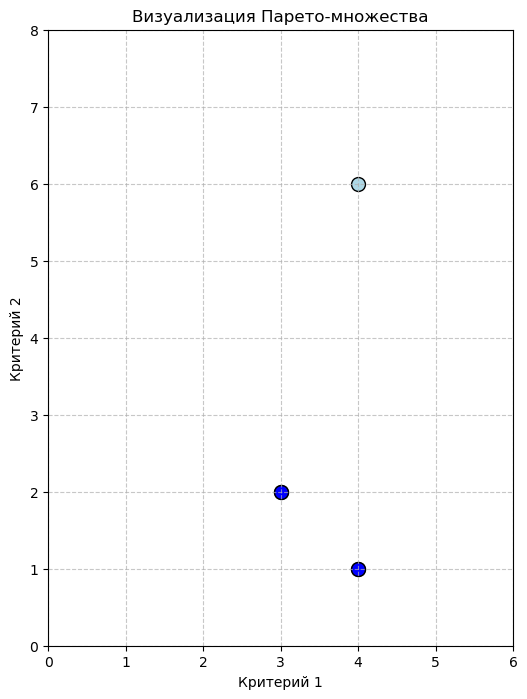

In [ ]:
pareto_set = s

def visualize_interactive_pareto_set_changes(step):
    #TODO: добавить легенду
    
    # Размер окна графика
    plt.figure(figsize=(s.max_x+2, s.max_y+2))


    all_old_x, all_old_y = [], []
    for solution in pareto_set.all_solusions_ever:
        all_old_x.append(solution.g1)
        all_old_y.append(solution.g2)

    plt.scatter(all_old_x, all_old_y, label='Pareto Set', color='lightblue', marker='o', s=100, edgecolors='black')

    x_values, y_values = [], []
    for solution in pareto_set.solutions:
        x_values.append(solution.g1)
        y_values.append(solution.g2)
    plt.scatter(x_values, y_values, label='Pareto Set', color='blue', marker='o', s=100, edgecolors='black')

        
    plt.xlim(0, pareto_set.max_x + 2)
    plt.ylim(0, pareto_set.max_y + 2)
    
    # Настройка графика
    plt.xlabel('Критерий 1')
    plt.ylabel('Критерий 2')
    plt.title('Визуализация Парето-множества')

    # Включаем грид только для местоположений точек
    plt.grid(True, linestyle='--', which='both', alpha=0.7)

    # Показываем график
    plt.show()

visualize_interactive_pareto_set_changes(12)